<a href="https://colab.research.google.com/github/rayramadharcs102/Ray-Ramadhar-Portfolio/blob/main/Data_Driven_Problem_Solving_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ray Ramadhar

Professor Masoumi

Data-Driven Problem Solving

30 October 2025

#How technological Investment transformed the manufacturing sector of the U.S. (1958-2018)

The data set is the NBER-CES Manufacturing Industry Database and it has information taken annually from 1958-2018 about the manufacturing industry sector.

I will be looking at the variables:

vship = sales output in millions

piship = vship deflator with 2012 1.0 reference

emp = employees in thousands

cap = physical capital in millions

equip = the automation more technical equipment

energy = cost of electricity & fuels in millions

pien = energy deflator with 2012 1.0 reference

tfp5 = 5-factor TFP index 2012=1.000 productivity measure

invest = Amount that the Industires invest in their equipment, upgrades etc

naics = North American Industrial Classification System industy type

naics_title = NAICS industry Class industry name


##Getting to know the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

url = 'https://raw.githubusercontent.com/MasoudMiM/ME-Data-Driven/refs/heads/master/midterm-project/Manufacturing_Industry_Database.csv'
df = pd.read_csv(url) #Reading CSV File
#display(df) #First 10 rows

#The shape of the dataset (number of rows and columns)
#shape = df.shape
#print(f'Shape of the dataset: {shape} ')

#The column names
#names = df.columns.tolist()
#print(f'Column names: {names}')

#The data types of each column
#print('Data types:')
#print(df.dtypes)

#Use .info() and .describe() to get a summary of the dataset.
#print('Summary statistics:')
#display(df.describe())
#display(df.info())

#Check for missing values in each column. Which columns have missing values and how many?
#print("Missing Value Count:")
#display(dfv.isnull().sum())
#print("Missing Value Total:")
#display(df.isnull().sum().sum())



#Intro to US Manufacturing Sector and Change Within it

"Manufacturing jobs helped build out the U.S. middle class following World War II, as the U.S. established pro-labor policies and faced limited global competition. Between 1980 and 1985, and then again 2001 to 2009, there were precipitous declines in US manufacturing jobs; it is estimated that 1/3 of U.S. manufacturing jobs vanished in the eight years between 2001 and 2009, and few have returned, the worst period for U.S. manufacturing since the Great Depression." [https://en.wikipedia.org/wiki/Manufacturing_in_the_United_States]

This evidence is proven through the data as there are sharp declines in the 80's and after 9/11 into the Great Recession. The Manufacturing Sector had fallen from the heights of Post World War II success, due to industry changes and unemployment.

However, the following data shows something that seems inconceivable. Despite the steady decline in manufacturing jobs, manufacturing output in the United States has increased by 80% since the 1980s. The cause of this was the increasing amount of technology and outsourcing in the industry. Below, the data will demonstrate the progression of the manufacturing industry from 1958-2018

#Pre-Automation Era (1958–1972)

In this period of time the output of the manufacturing industry as well as the employment of workers was rising. Automation had not taken over the industry yet. Let's look clean the emp, vship, columns and look at the trends of them in this time period. We may also need pship to look at the value of vship without inflation with reference to 2012 1.0 inflation.

###1) Looking at Employment and Output Trends (emp, vship, piship, naics)

a) Cleaning the Data

In [ ]:
#1) Re-naming the above mentioned columns
df.rename(columns={'emp' : 'empworkers','vship' : 'sales', 'piship' : 'defv', 'naics' : 'indtype', 'naics_title' : 'industry'}, inplace = True)

#2) Cleaning the data in the above mentioned columns
print('a)Checking null sums for industry name and type compared to employed workers, sales value, and deflation value before dropping:')
df_worker_value = df[['indtype','industry','empworkers','sales','defv']]
display(df_worker_value.isnull().sum())
#So employed workers values of shipment and deflated value are all null the same amount 117, but the industry name and type is never null
#So its probably a specific industry

#3) Let's see which of the rows have these missing columns
missingindmask =  df_worker_value.isnull().any(axis=1)
filtered_missing = df.loc[missingindmask, 'industry']
print("\nb)Unique industries with missing employed workers, sales value, and deflation value")
print(filtered_missing.unique())

#4) Now that we know the names of 3 industries that are null lets see if this is only for the time period
#display(df[df['industry'] == 'Retail Bakeries'].groupby('year')[['empworkers','sales','defv']].agg(list))
#display(df[df['industry'] == 'Tire Retreading'].groupby('year')[['empworkers','sales','defv']].agg(list))
#display(df[df['industry'] == 'Dental Laboratories'].groupby('year')[['empworkers','sales','defv']].agg(list))
#Using these above test codes I realized that the NaN values for the variable I was looking at occur when year < 1972
#So i think I will drop those rows as only 3 industries

#5) Dropping the rows missing
print('\nc)Checking null sums for industry name and type compared to employed workers, sales value , and deflation value after dropping:')
df.dropna(axis = 0, how = 'all', subset = ['empworkers','sales','defv'], inplace=True)
display(df[['empworkers','sales','defv']].isnull().sum())
df.reset_index(drop=True, inplace=True)

#6) Now that all the rows with these particular values are gone we can explore the data. #


a)Checking null sums for industry name and type compared to employed workers, sales value, and deflation value before dropping:


,0
indtype,0
industry,0
empworkers,117
sales,117
defv,117



b)Unique industries with missing employed workers, sales value, and deflation value
['Retail Bakeries' 'Tire Retreading' 'Dental Laboratories']

c)Checking null sums for industry name and type compared to employed workers, sales value , and deflation value after dropping:


,0
empworkers,0
sales,0
defv,0


b) Analyzing the Worker Employment and Sales Value from 1958-1972

a)First 5 rows:


,empworkers,real_sales_value,sales
0,18.0,2944.632751,1042.4
1,17.9,3046.376822,1051.0
2,17.7,3832.846869,1050.2
3,17.5,4101.465173,1119.7
4,17.6,4244.404179,1175.7



Shape: 
(5415, 3)

Columns:
['empworkers', 'real_sales_value', 'sales']

Data Types:
empworkers          float64
real_sales_value    float64
sales               float64
dtype: object

Description of Data: 
        empworkers  real_sales_value         sales
count  5415.000000       5415.000000   5415.000000
mean     46.599132       7424.377622   1380.793333
std      61.937971      17129.731636   2132.637930
min       0.500000          0.451460     25.600000
25%      14.200000       1906.323992    413.000000
50%      26.700000       3677.508593    754.700000
75%      54.800000       7280.389398   1446.450000
max     565.700000     330287.676087  24111.000000


b) Producing a Scatterplot of the Data:


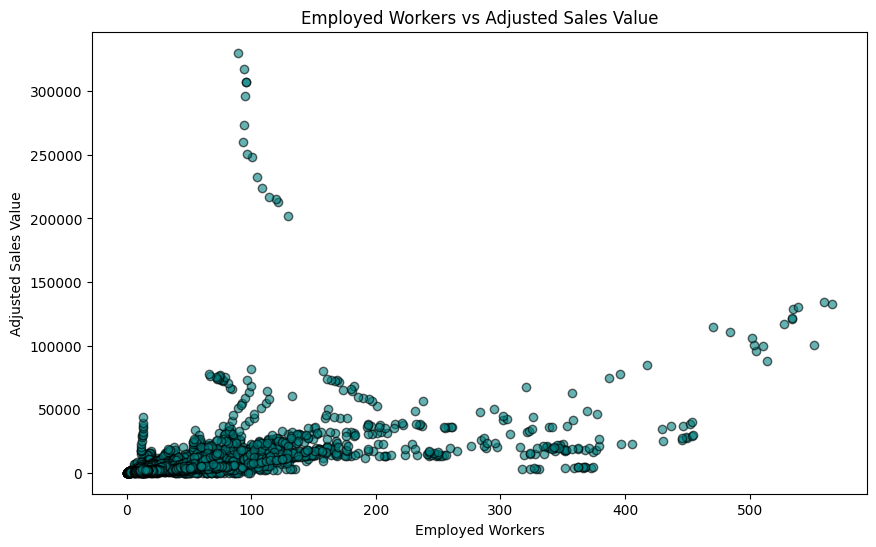


c) 
Correlation between Employment and Output sales: 0.7270055499011049


d) Outliers:


,indtype,industry,year,empworkers,pay,prode,prodh,prodw,sales,matcost,...,plant,defv,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,real_sales_value
6183,324110,Petroleum Refineries,1958,129.5,831.7,96.1,185.8,582.5,13523.8,11560.7,...,12155.0,0.067,0.102,0.188,0.094,NaN,1.255,NaN,1.259,201847.756166
6184,324110,Petroleum Refineries,1959,121.6,831.7,90.0,175.4,579.6,14036.3,11912.3,...,14513.0,0.066,0.100,0.188,0.098,0.012,1.270,0.012,1.274,212671.213274
6185,324110,Petroleum Refineries,1960,119.7,824.2,87.5,172.2,570.7,14422.3,11998.6,...,15917.0,0.067,0.100,0.189,0.105,0.019,1.294,0.019,1.298,215258.203593
6186,324110,Petroleum Refineries,1961,114.2,825.3,83.1,163.1,565.7,14527.9,12018.3,...,17525.1,0.067,0.102,0.189,0.105,0.020,1.321,0.020,1.325,216834.322957
6187,324110,Petroleum Refineries,1962,109.0,798.5,79.0,155.1,541.8,14802.8,12249.8,...,18930.1,0.066,0.103,0.190,0.111,0.033,1.365,0.033,1.369,224284.849700
6188,324110,Petroleum Refineries,1963,104.9,812.3,76.6,149.0,551.9,15345.4,12615.8,...,20092.3,0.066,0.103,0.194,0.111,0.023,1.397,0.023,1.402,232506.061866
6189,324110,Petroleum Refineries,1964,100.9,797.9,73.4,145.1,543.6,15629.0,12841.3,...,21012.1,0.063,0.101,0.197,0.107,0.038,1.452,0.039,1.457,248079.361089
6190,324110,Petroleum Refineries,1965,96.4,781.6,70.2,137.7,532.6,16278.8,13214.2,...,22198.6,0.065,0.101,0.203,0.106,-0.018,1.426,-0.018,1.431,250443.086109
6191,324110,Petroleum Refineries,1966,93.6,790.3,67.9,134.2,536.8,17448.7,13817.8,...,23764.2,0.067,0.103,0.209,0.106,0.008,1.438,0.008,1.443,260428.351722
6192,324110,Petroleum Refineries,1967,94.6,849.9,68.0,135.7,568.0,18876.7,14801.9,...,25459.6,0.069,0.103,0.216,0.098,0.000,1.439,0.000,1.444,273575.369172



e) Industries with top 5 real sales values: 
industry
Petroleum Refineries                                 259673.177414
Iron and Steel Mills and Ferroalloy Manufacturing    113328.943461
Tobacco Manufacturing                                 73274.309381
Animal (except Poultry) Slaughtering                  66155.847150
Aircraft Manufacturing                                55846.966971
Name: real_sales_value, dtype: float64



In [ ]:
#1)To make the data seem more in perspective I am gonna use the defv to scale the sales value
df = df.copy()
df.loc[:, 'real_sales_value'] = df['sales'] / df['defv']

#Lets Look at some descriptive statistics about these variables
mask_year = df['year'] < 1973
df_byyear = df[mask_year]
df_empoutput = df_byyear[['empworkers', 'real_sales_value', 'sales' ]]
print("a)First 5 rows:")
display(df_empoutput.head())
print(f'\nShape: \n{df_empoutput.shape}')
print(f'\nColumns:\n{df_empoutput.columns.tolist()}')
print(f'\nData Types:\n{df_empoutput.dtypes}')
print(f'\nDescription of Data: \n{df_empoutput.describe()}\n')

#2)Producing a Scatterplot of the Data
print('\nb) Producing a Scatterplot of the Data:')
plt.figure(figsize=(10, 6))
plt.scatter(df_empoutput['empworkers'], df_empoutput[['real_sales_value']],alpha=0.6, color='teal', edgecolor='black')
plt.xlabel('Employed Workers')
plt.ylabel('Adjusted Sales Value')
plt.title('Employed Workers vs Adjusted Sales Value')
plt.show()

#3)Producing a Scatterplot of the Data     Note* I use normal sales here not adjusted to make the correlation accurate to the year
corr_emp_out = df_empoutput['empworkers'].corr(df_empoutput['sales'])
print(f'\nc) \nCorrelation between Employment and Output sales: {corr_emp_out}\n')

#4)What are those outliers?
mask_outliers = (df_byyear['empworkers'] < 200) & (df_byyear['empworkers'] > 50) & (df_byyear['real_sales_value'] > 150000)
df_outliers = df_byyear[mask_outliers]
print('\nd) Outliers:')
display(df_outliers)

#5)Find the industries with top 5 real sales values/ouputs.
top_ind = df_byyear.groupby('industry')['real_sales_value'].mean()
ascending = top_ind.sort_values(ascending=False).head(5)
print(f'\ne) Industries with top 5 real sales values: \n{ascending}\n')




a) These descriptive statistics show that both of these columns are both float type, suitable for plotting, have the same size, so they can be plotted 1 to 1. They also show the range and mean of employees, demonstrating the size of these industries, small to medium sized in modern times. It also shows the  adjusted sales value for the industries by year, which are generally in millions.

b) The plot shows something that I find interesting. Some companies with around or a bit less than 100,000 employees have the maximum sales values. I thought more employees meant more sales value but this says otherwise.

c) The correlation between employment and the non-adjusted sales is resonably high at 0.727, which indicates a strong positive correlation, and an indication the human workers led the workforce at this time, without as much tech involvement.

d)I used a mask to find the outliers during this time period, and interstingly anough they were all from the same industry annually. With a mean real sales output of around 260000 petroleum dominated the manufacturing industry with less emplyees than many others, likely due to the high demand in it, but what else helped them?

e) Between the years of 1958-1972 the most major manufacturing industries were in Petroleum, Tobacco, Material manufacturing, Animal Slaughtering, and Aircraft Manufacturing. This shows the most major businesses so we will later see how technology either helps or hurts these industries and their employees.

###2)Looking at the technological use in perspective of capital (cap, equip, vship, piship, naics)

a) Cleaning the Data

In [ ]:
#1) Cleaning the data in the above mentioned columns
print('a)Checking null sums for industry name and type compared to all physical capital, tech equipment, and sales:')
df_cap_equip = df[['industry','cap','equip','sales', 'year']]
display(df_cap_equip.isnull().sum()) #Sales Already at 0 null as expected
#So all physical capital and tech equipment are missing same amount 728
#So its probably a specific industry or industries like before

#2) My guess was incorrect the missing values come from many different industries so we shouldn't drop rows

#3) Let's define the dataframe with this particular year mask
capqeuip_year1 = df['year'] < 1973
df_cap_equip_phase1 = df_cap_equip[capqeuip_year1]
#We dont need to clean. By test it was found the NaN values in all the tested variables occur in 2017 and 2018.

#4) Now that all the rows with these particular values are gone we can explore the data.


a)Checking null sums for industry name and type compared to all physical capital, tech equipment, and sales:


,0
industry,0
cap,728
equip,728
sales,0
year,0


b) Analyzing the physical and tech equipment over time

a)First 5 rows:


,industry,cap,equip,sales,year,tech_ratio
0,Dog and Cat Food Manufacturing,1212.7,517.6,1042.4,1958,0.426816
1,Dog and Cat Food Manufacturing,1299.0,573.7,1051.0,1959,0.441647
2,Dog and Cat Food Manufacturing,1350.7,611.6,1050.2,1960,0.452802
3,Dog and Cat Food Manufacturing,1394.4,642.6,1119.7,1961,0.460843
4,Dog and Cat Food Manufacturing,1437.8,669.1,1175.7,1962,0.465364



Shape: 
(5415, 6)

Columns:
['industry', 'cap', 'equip', 'sales', 'year', 'tech_ratio']

Data Types:
industry       object
cap           float64
equip         float64
sales         float64
year            int64
tech_ratio    float64
dtype: object

Description of Data: 
                 cap         equip         sales         year   tech_ratio
count    5415.000000   5415.000000   5415.000000  5415.000000  5415.000000
mean     2431.129825   1140.659058   1380.793333  1965.000000     0.453954
std      6487.856542   3491.045310   2132.637930     4.320893     0.072481
min        12.900000      5.800000     25.600000  1958.000000     0.055505
25%       536.750000    239.000000    413.000000  1961.000000     0.409943
50%      1049.400000    480.700000    754.700000  1965.000000     0.456061
75%      2208.500000    990.200000   1446.450000  1969.000000     0.495089
max    110841.800000  63957.700000  24111.000000  1972.000000     0.790423

b)Mean tech equipment used through the years across i

,tech_ratio
year,
1958,0.427716
1959,0.432209
1960,0.435744
1961,0.437437
1962,0.439210
1963,0.442023
1964,0.444190
1965,0.450859
1966,0.457644



c)Bar Graph of the ratio of mean tech equipment used through the years:


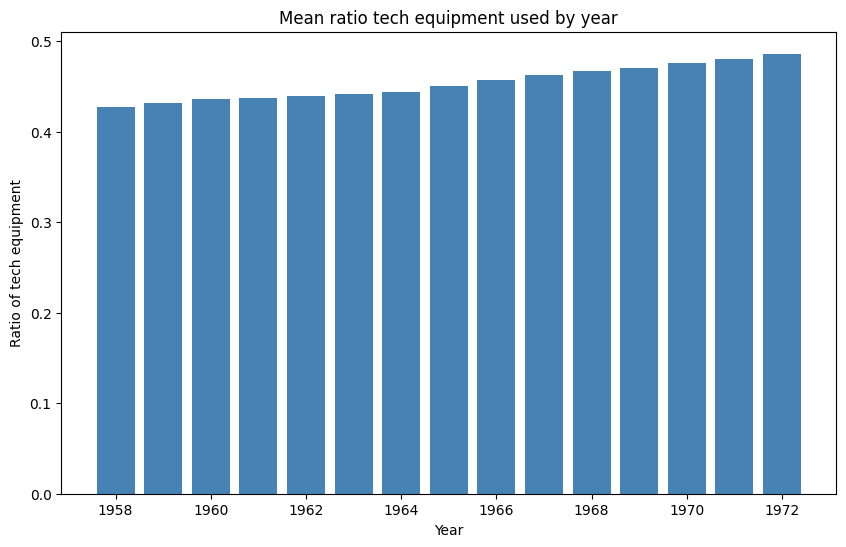

In [ ]:
#1)To make the data seem more in perspective I am gonna use a ratio between tech equipment and all physical proprty
df_cap_equip_phase1 = df_cap_equip_phase1.copy()
df_cap_equip_phase1.loc[:, 'tech_ratio'] = df['equip'] / df['cap']

#Lets Look at some descriptive statistics about these variables
print("a)First 5 rows:")
display(df_cap_equip_phase1.head())
print(f'\nShape: \n{df_cap_equip_phase1.shape}')
print(f'\nColumns:\n{df_cap_equip_phase1.columns.tolist()}')
print(f'\nData Types:\n{df_cap_equip_phase1.dtypes}')
print(f'\nDescription of Data: \n{df_cap_equip_phase1.describe()}\n')

#2)Looking at the mean amount of tech equipment across industries used through 1958-1972
mean_tech = df_cap_equip_phase1.groupby('year')['tech_ratio'].mean()
print('b)Mean tech equipment used through the years across industries:')
display(mean_tech)

#3)Graphing the increase of the mean tech ratio
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_tech.index, mean_tech.values, color='steelblue')
ax.set_title('Mean ratio tech equipment used by year')
ax.set_ylabel('Ratio of tech equipment')
ax.set_xlabel('Year')
print('\nc)Bar Graph of the ratio of mean tech equipment used through the years:')
plt.show()



From the descriptive statistics, the range and means of all the physical and the tech equipments used are shown and compared to find the tech ratio which is studied by year in the groupby table and plot.

The ratio of mean tech used, though steadily increasing during this time period, remains well below 0.5. This indicates that technology has not fully advanced as it has to today which is obvious, but also shows the dependence on human labor in manufacturing at the time.

Manufacturing at this time was booming post world war in the U.S., and it is clear from the earlier statistics showing sales value, and even as it moved through wars like the Vietnam war, the sales of companies stayed up with technology improving steadily, and a rang eof industries.

###3)Tracking Employment and Sales Output and Productivity from 1958-1972


Line Graphs of mean industry employment and sales output across industries through the years 1958-1972:


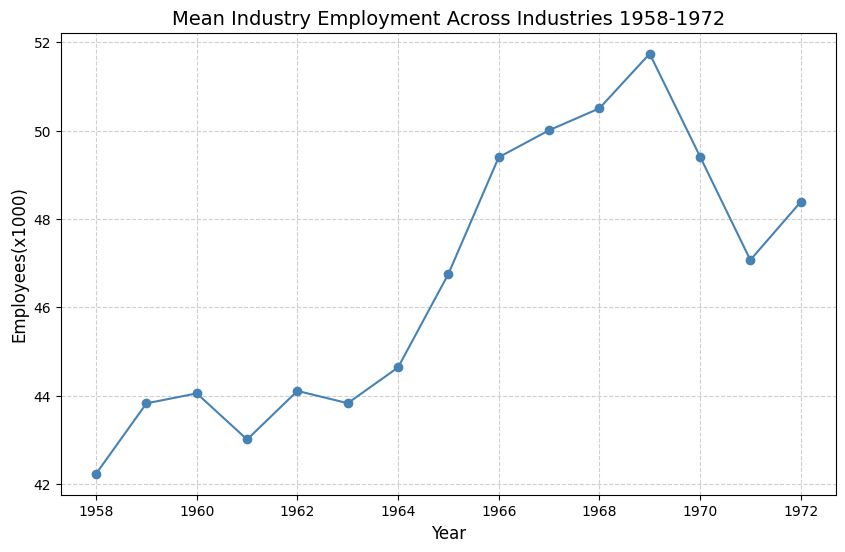

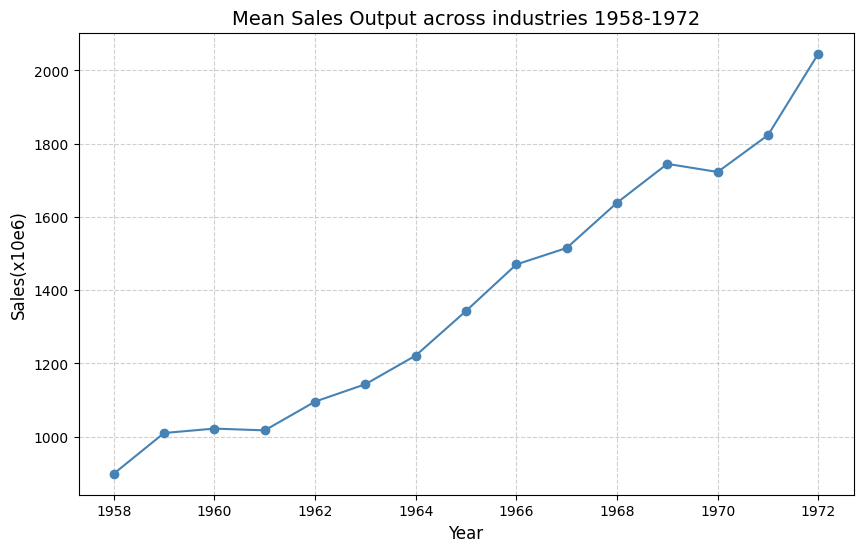


c)Correlation between employees and sales: 0.7270055499011049


Scatterplot of mean industry productivity across industries through the years 1958-1972:


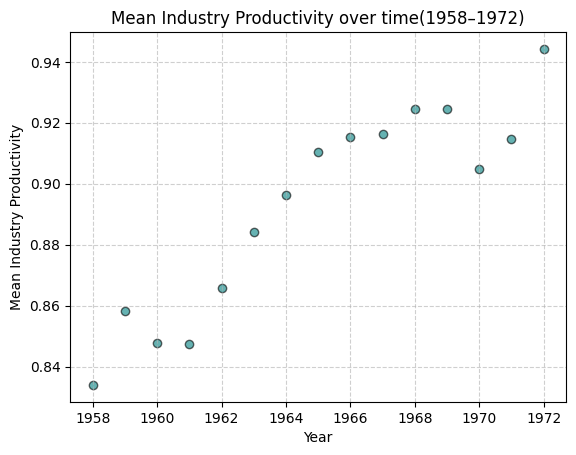

In [ ]:
#Finding mean employment across industries
df.rename(columns={ 'tfp5' : 'productivity'}, inplace = True)#Simpler Rename
df_tracking5872 = df[df['year'] < 1973]
mean_emp_5872 = df_tracking5872.groupby('year')[['empworkers']].mean()
mean_sales_5872 = df_tracking5872.groupby('year')[['sales']].mean()

print('\nLine Graphs of mean industry employment and sales output across industries through the years 1958-1972:')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_emp_5872.index, mean_emp_5872.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Industry Employment Across Industries 1958-1972', fontsize=14)
ax.set_ylabel('Employees(x1000)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_sales_5872.index, mean_sales_5872.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Sales Output across industries 1958-1972', fontsize=14)
ax.set_ylabel('Sales(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

corr_empsales_5872 = df_tracking5872['empworkers'].corr(df_tracking5872['sales'])
print(f'\nc)Correlation between employees and sales: {corr_empsales_5872}\n')

#2)Plotting productivity over time on scatterplot
print('\nScatterplot of mean industry productivity across industries through the years 1958-1972:')
mean_prod_5872 = df_tracking5872.groupby('year')['productivity'].mean()
plt.scatter(mean_prod_5872.index, mean_prod_5872.values, alpha=0.6, color='teal', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Mean Industry Productivity')
plt.title('Mean Industry Productivity over time(1958–1972)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


a)The employment graph stays resonably steady. This is because over that course manufacturing was booming even with limited technology. This is especially due to WWII which only cause this industry to expand.

b)The sales graph was generally linear with few bumps, and none majors, demonstrating the growing manufacturing industry in the U.S., along with employment. Again a cause of WWII.

c)The correlation between the employement and sales is strongly postive indicating a relationship between the two.

d)The productivity slowly is rising to the point where the U.S. is almost breaking even with outputs and inputs.

###

##Oil Shocks and Capital Deepening (1973–1985)

This is really the period of time where manufacturing in the U.S was changing due to a variety of technology involvement,legalization of companies buying their own shares of stock in 1982, outsourcing, and supply chain innovation. Let's look and clean the energy column. We will also look at, vship(sales), cap, and equip, but those columns are already clean. We may also need pship to look at the value of vship without inflation with reference to 2012 1.0 inflation.

###1) Energy/Sales ratio analysis

a) Cleaning the energy column

In [ ]:
#1) Cleaning the data in the above mentioned columns
print('a)Checking null sums for energy, compated to physical capital, tech equipment, sales, and year:')
df_energy = df[['energy','industry','cap','equip','sales', 'year', 'defv', 'empworkers','pien']]
display(df_energy.isnull().sum()) #Sales already at 0 null as expected, and energy clean already
#However, physical capital and tech equipment are missing same amount 728, so that means all the null values are after 1972

#2) Let's define the dataframe with this particular year mask
#We dont need to clean. By test it was found the NaN values in all the tested variables occur in 2017 and 2018.
technology_year2 = (df['year'] < 1986) & (df['year'] > 1972)
df_technology_phase2 = df_energy[technology_year2]
#4) Now that all the rows with these particular values are gone we can explore the data. #
#Note* I checked .isnull().sum with capqeuip_year2 mask, and still none of those NaN values are before 1986


a)Checking null sums for energy, compated to physical capital, tech equipment, sales, and year:


,0
energy,0
industry,0
cap,728
equip,728
sales,0
year,0
defv,0
empworkers,0
pien,0


b)Looking into the energy cost/sales output through the years as well as there correlation, and the correlation between energy and equip. I expect this to increase or stay stead since industries started making more money but used a lot of energy given the more advanced and efficient tools. This would probably dip back down after the 2000s as energy efficiency became more important. There was also fluctation in oil prices which may have caused volatility in the graph

a)First 5 rows:


,energy,industry,cap,equip,sales,year,defv,empworkers,pien,real_sales_value,real_energy,energy_sales_ratio
15,14.0,Dog and Cat Food Manufacturing,2235.8,1214.0,1726.1,1973,0.337,13.7,0.147,5121.958269,95.238095,0.018594
16,19.9,Dog and Cat Food Manufacturing,2420.8,1352.3,1869.3,1974,0.401,13.9,0.192,4661.596090,103.645832,0.022234
17,24.9,Dog and Cat Food Manufacturing,2564.3,1476.6,2091.2,1975,0.423,14.3,0.230,4943.735133,108.260868,0.021899
18,30.0,Dog and Cat Food Manufacturing,2613.6,1504.9,2405.5,1976,0.423,14.4,0.274,5686.761124,109.489055,0.019253
19,34.3,Dog and Cat Food Manufacturing,2624.0,1518.5,2775.1,1977,0.453,15.5,0.318,6126.048443,107.861639,0.017607



Shape: 
(4693, 12)

Columns:
['energy', 'industry', 'cap', 'equip', 'sales', 'year', 'defv', 'empworkers', 'pien', 'real_sales_value', 'real_energy', 'energy_sales_ratio']

Data Types:
energy                float64
industry               object
cap                   float64
equip                 float64
sales                 float64
year                    int64
defv                  float64
empworkers            float64
pien                  float64
real_sales_value      float64
real_energy           float64
energy_sales_ratio    float64
dtype: object

Description of Data: 
            energy            cap         equip          sales         year  \
count  4693.000000    4693.000000   4693.000000    4693.000000  4693.000000   
mean    114.030386    3742.797486   2076.832708    4398.447411  1979.000000   
std     354.724901    7938.770195   4622.987127    8792.608121     3.742056   
min       0.900000      32.400000     14.500000     120.600000  1973.000000   
25%      18.000000    

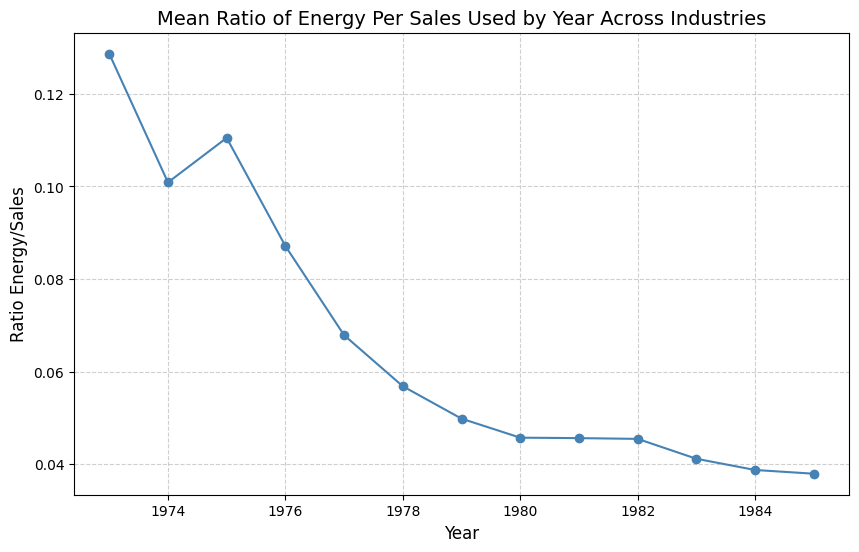


c) 
Correlation between energy and sales: 0.5996372816749882


d) 
Correlation between energy and tech equipment: 0.8872597810206837



In [ ]:
#1) Define the ratio of interest to me
df_technology_phase2 = df_technology_phase2.copy()
df_technology_phase2.loc[:, 'real_sales_value'] = df_technology_phase2['sales'] / df_technology_phase2['defv']
df_technology_phase2.loc[:, 'real_energy'] = df_technology_phase2['energy'] / df_technology_phase2['pien']
df_technology_phase2.loc[:, 'energy_sales_ratio'] = df_technology_phase2['real_energy'] / df_technology_phase2['real_sales_value']

#2) Lets Look at some descriptive statistics about these variables
print("a)First 5 rows:")
display(df_technology_phase2.head())
print(f'\nShape: \n{df_technology_phase2.shape}')
print(f'\nColumns:\n{df_technology_phase2.columns.tolist()}')
print(f'\nData Types:\n{df_technology_phase2.dtypes}')
print(f'\nDescription of Data: \n{df_technology_phase2.describe()}\n')

#3) Shows energy intensity trends across industries through the years
print('\nb)Line Graph of the ratio of mean energy/sales used through the years 1973-1985:')
e_over_s_mean = df_technology_phase2.groupby('year')['energy_sales_ratio'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(e_over_s_mean.index, e_over_s_mean.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Ratio of Energy Per Sales Used by Year Across Industries', fontsize=14)
ax.set_ylabel('Ratio Energy/Sales', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

#4) Correlation between energy/sales ration and equip/cap ratio
corr_energy_sales = df_technology_phase2['real_energy'].corr(df_technology_phase2['real_sales_value'])
print(f'\nc) \nCorrelation between energy and sales: {corr_energy_sales}\n')
corr_energy_equip = df_technology_phase2['real_energy'].corr(df_technology_phase2['equip'])
print(f'\nd) \nCorrelation between energy and tech equipment: {corr_energy_equip}\n')



The descriptive statistics demonstrate how the worth of industries continued increasing to multimillion dollar industries and the energy/sale ratio increasing.

The energy/sales ratio spikes in the 70's because of the new want for automation equipment (equip), the fluctuating oil prices, and the lack of energy efficent machines we have today. Then it starts to steadily decline.

The correlations tell something important as well. Since the energy and tech equipment corr. is close to 1, then the resonably strong correlation between energy and sales output, demonstrates that the increase in energy, and therefore technology has a positive relationship with the sales output.

###2) Next, we can look at the tech equipment per worker to demonstrate capital deepening


b)Line Graph of the ratio of mean equip/emp used through the years 1973-1985:


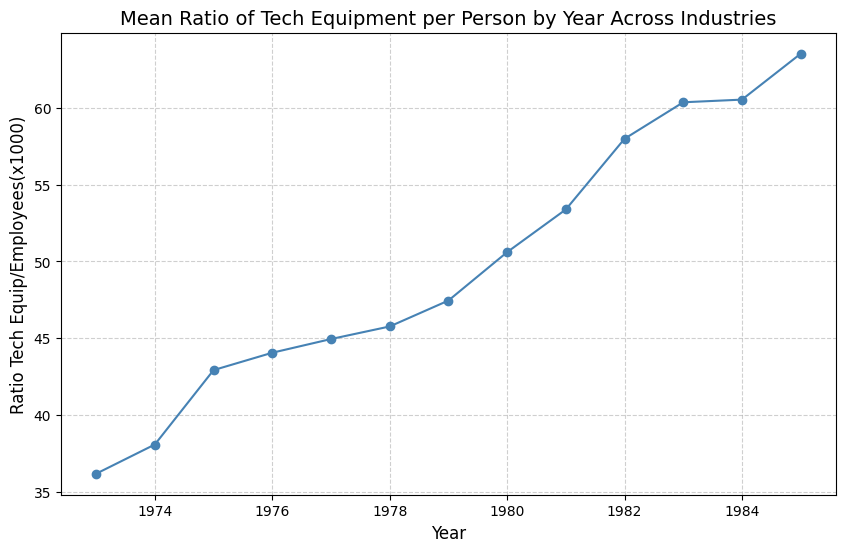


c) Industries with top 5 amount tech equipment used: 
industry
Iron and Steel Mills and Ferroalloy Manufacturing    68425.484615
Petroleum Refineries                                 31900.207692
All Other Basic Organic Chemical Manufacturing       20288.838462
Paper (except Newsprint) Mills                       19080.584615
Paperboard Mills                                     14172.892308
Name: equip, dtype: float64



In [ ]:
#1)Defining a new ratio cap/emp
df_technology_phase2 = df_technology_phase2.copy()
df_technology_phase2.loc[:, 'equip_emp_ratio'] = df_technology_phase2['equip'] / df_technology_phase2['empworkers']

#2)Mean Capital per Worker ratio
print('\nb)Line Graph of the ratio of mean equip/emp used through the years 1973-1985:')
equip_emp_ratio = df_technology_phase2.groupby('year')['equip_emp_ratio'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(equip_emp_ratio.index, equip_emp_ratio.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Ratio of Tech Equipment per Person by Year Across Industries', fontsize=14)
ax.set_ylabel('Ratio Tech Equip/Employees(x1000)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

#3)Wow that really high 60:1 at some points. Which industries are using all of this automation?
top_ind_equip = df_technology_phase2.groupby('industry')['equip'].mean()
ascending_equip = top_ind_equip.sort_values(ascending=False).head(5)
print(f'\nc) Industries with top 5 amount tech equipment used: \n{ascending_equip}\n')



The higher cap/emp is the more technology used over employees, hence capital deepening. With increasing technology used the tech equipment per worker rose to heights of 60:1, with material mand chemical manufacturing, petroleum industries, and paper mills depending on this automation the most.


###3)Tracking Employment and Sales Output and Productivity from 1958-1985


Line Graphs of mean industry employent and sales output through the years 1958-1985:


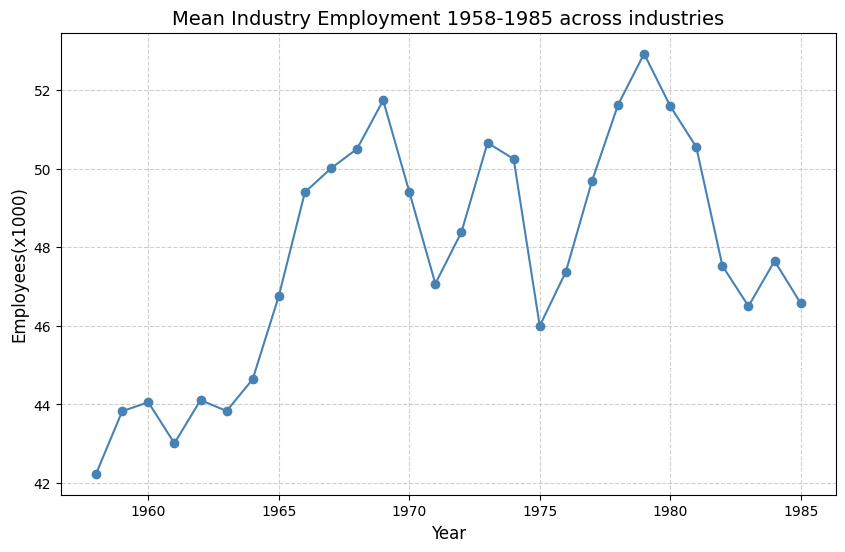

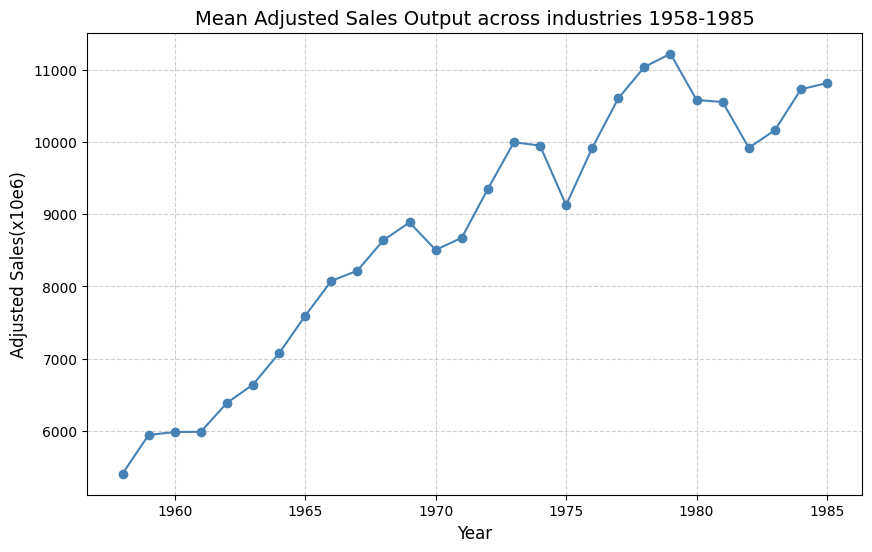


c)Correlation between employees and adjusted sales: 0.40483993041320004


Scatterplot of mean industry productivity across industries through the years 1958-1985:


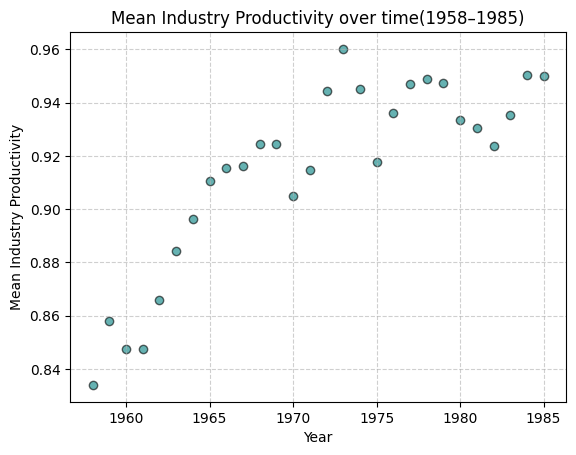

In [ ]:
#Finding mean employment across industries
#So I take the mean of employees across all industries, and mean of sales accross all industries
df['real_sales'] = df['sales'] / df['defv'] #Adjusted to account for inflation
df_tracking5885 = df[(df['year'] < 1986) & (df['year'] > 1957)]
mean_emp_5885 = df_tracking5885.groupby('year')[['empworkers']].mean()
mean_sales_5885 = df_tracking5885.groupby('year')[['real_sales']].mean()

print('\nLine Graphs of mean industry employent and sales output through the years 1958-1985:')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_emp_5885.index, mean_emp_5885.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Industry Employment 1958-1985 across industries', fontsize=14)
ax.set_ylabel('Employees(x1000)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_sales_5885.index, mean_sales_5885.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Adjusted Sales Output across industries 1958-1985', fontsize=14)
ax.set_ylabel('Adjusted Sales(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

corr_empsales_5885 = df_tracking5885['empworkers'].corr(df_tracking5885['real_sales'])
print(f'\nc)Correlation between employees and adjusted sales: {corr_empsales_5885}\n')

#2)Plotting productivity over time on scatterplot
print('\nScatterplot of mean industry productivity across industries through the years 1958-1985:')
mean_prod_5885 = df_tracking5885.groupby('year')['productivity'].mean()
plt.scatter(mean_prod_5885.index, mean_prod_5885.values, alpha=0.6, color='teal', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Mean Industry Productivity')
plt.title('Mean Industry Productivity over time(1958–1985)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


a)The employment graph has more fluctuations demonstrating change in the industry. This is because over that course of the 80's technology and automation was improving, outsourcing was at its onset, and less and less worker were gonna be needed then and for the following decades.

b)The sales graph stayed generally linear with few bumps, and none major besides a slump in the 80s. This slump was caused because of the oil fluctuations in the 80s due to overseas wars. Still, this demonstrates the growing sales outputmanufacturing industry in the U.S..

c)The correlation between the employement and sales is no longer strongly postive but far weaker at 0.40 indicating that more workers doesnt necessarily raise the sales output.

d)The productivity slowly is rising to the point where the U.S. is almost breaking even with outputs and inputs.

##Automation & Offshoring (1986–2000)

This period of time built off the last with automation increasing with higher energy efficiency and offshoring raising profits and sales output of industries, but causing the amount of employed workers to continue to decline. This is also soon before the massive loss of manufacturing jobs upon the turn of the century. Let's look and clean the tfp5, total factor productivity column. We will also look at, vship(sales), emp(empworkers), and equip, but those columns are already clean. Investing will come up later, since I am trying to see if the people who invest in capital excelled in 2000-2018, the next phase.

1) Looking at productivity (tfp5) over time and comparing to equip/empworkers

a) Cleaning the tfp5 and recleaning equip

In [ ]:
#1) Cleaning the data in the above mentioned columns
print('a)Checking null sums for productivity and investment, compared to physical capital, tech equipment, sales, and year 1958-2018:')
df_productivity = df[['productivity','industry','cap','equip','sales', 'year','empworkers', 'invest']]
display(df_productivity.isnull().sum()) #Sales already at 0 null as expected
#However, physical capital(cap) and tech equipment(equip) are missing same amount, 728, so that means all the null values are after 1986

#2) Let's define the dataframe with this particular year mask
#We dont need to clean. By test it was found the NaN values in all the tested variables occur in 2017 and 2018.
technology_year3 = (df['year'] < 2001) & (df['year'] > 1985)
df_technology_phase3 = df_productivity.loc[technology_year3].copy()

#3) Lets try to clean the invest column with 364 NaN
df_technology_phase3['invest'].isnull().sum()
#When the data from invest column is taken during 1986-2000, the null values are 0 so no cleaning needed

#4) Now that all the rows with these particular values are gone we can explore the data.



a)Checking null sums for productivity and investment, compared to physical capital, tech equipment, sales, and year 1958-2018:


,0
productivity,728
industry,0
cap,728
equip,728
sales,0
year,0
empworkers,0
invest,364


np.int64(0)

b) Tracking productivity and correlations

a)First 5 rows:


,productivity,industry,cap,equip,sales,year,empworkers,invest
28,0.896,Dog and Cat Food Manufacturing,2672.0,1607.5,4925.2,1986,14.2,102.2
29,0.853,Dog and Cat Food Manufacturing,2684.1,1619.4,5069.3,1987,13.4,108.2
30,0.907,Dog and Cat Food Manufacturing,2725.5,1664.7,5956.4,1988,13.7,143.9
31,0.922,Dog and Cat Food Manufacturing,2811.6,1756.9,6703.3,1989,13.2,144.2
32,0.904,Dog and Cat Food Manufacturing,2886.9,1823.8,7015.0,1990,12.9,167.9



Shape: 
(5427, 8)

Columns:
['productivity', 'industry', 'cap', 'equip', 'sales', 'year', 'empworkers', 'invest']

Data Types:
productivity    float64
industry         object
cap             float64
equip           float64
sales           float64
year              int64
empworkers      float64
invest          float64
dtype: object

Description of Data: 
       productivity           cap         equip          sales         year  \
count   5427.000000   5427.000000   5427.000000    5427.000000  5427.000000   
mean       0.978462   4699.544242   3001.816289    8780.658743  1993.012161   
std        0.233571   8614.810801   5766.049054   13452.512020     4.324158   
min        0.016000     92.000000     34.300000     223.600000  1986.000000   
25%        0.844000   1329.500000    750.100000    2852.200000  1989.000000   
50%        0.969000   2310.000000   1428.700000    4790.300000  1993.000000   
75%        1.102000   4515.250000   2852.300000    8966.150000  1997.000000   
max        

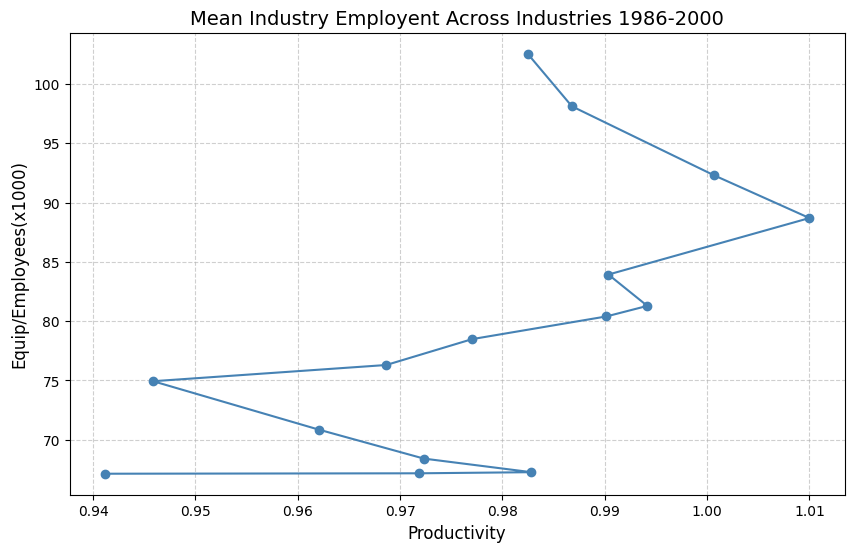


c)Correlation between tech equipment/employees and productivity: -0.11640946967031643



In [ ]:
#1)Mean Capital per Worker ratio
mean_prod = df_technology_phase3.groupby('year')['productivity'].mean()

#Lets Look at some descriptive statistics about these variables
print("a)First 5 rows:")
display(df_technology_phase3.head())
print(f'\nShape: \n{df_technology_phase3.shape}')
print(f'\nColumns:\n{df_technology_phase3.columns.tolist()}')
print(f'\nData Types:\n{df_technology_phase3.dtypes}')
print(f'\nDescription of Data: \n{df_technology_phase3.describe()}\n')

#3)Comparing equip/empworkers to productivity across industries(This part seems confusing, talk about in conclusion)
print('\na)Scatterplot of the mean productivity used through the years 1986-2000:')
df_technology_phase3['equip_emp_ratio'] = df_technology_phase3['equip'] / df_technology_phase3['empworkers']
mean_equipemp = df_technology_phase3.groupby('year')[['equip_emp_ratio']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_prod.values, mean_equipemp.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Industry Employent Across Industries 1986-2000', fontsize=14)
ax.set_ylabel('Equip/Employees(x1000)', fontsize=12)
ax.set_xlabel('Productivity', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation_prod = df_technology_phase3['equip_emp_ratio'].corr( df_technology_phase3['productivity'])
print(f'\nc)Correlation between tech equipment/employees and productivity: {correlation_prod}\n')


This information was the second thing to take me a bit by surprise as I really thought there would be a stronger linear corellation between the ratio of equip/emp and productivity. All the other infromation seems to indivate that the trend of increasing tech impoves sales output, and with productivty steadily increasing I thought the grah would be more linear and for the correlation to be positive and >0.6.

The descriptive statistics show how thehigh productivity in comparison to previous decades with outputs almost matching the inputs on average, while we also see the now larger range between investments, capital, and equpment, as companies start to change their means of business torwards automation causing job loss.

###2)Looking at industries and which excelled at this time

In [ ]:
#Grouping by industry to find out which companies are succeeding at this time
#Industry With Max Sales Output 1986-2000
print('Industry With Max Mean Sales Output 1986-2000')
for_industry_count = df_technology_phase3.groupby('industry')['sales'].mean().idxmax()
display(for_industry_count)

#Most Common Industry 1986-2000
ind_count = df_technology_phase3['industry'].value_counts().head(5)
print(f'\n5 most common industries:\n{ind_count}\n')

#Industries with top 5 sales outputa 1986-2000
top_ind_phase3 = df_technology_phase3.groupby('industry')['sales'].mean()
ascending_ind_sales = top_ind_phase3.sort_values(ascending=False).head(5)
print(f'\nd) Industries with top 5 sales values(1986-2000): \n{ascending_ind_sales}\n')

#Industries with most investment of capital
top_investors = df_technology_phase3.groupby('industry')['invest'].mean()
ascending_ind_invest = top_investors.sort_values(ascending=False).head(5)
print(f'\nd) Industries with top 5 capital investing (1986-2000): \n{ascending_ind_invest}\n')

#Industries with most tech equipment used of capital
top_ind_equip = df_technology_phase3.groupby('industry')['equip'].mean()
ascending_ind_equip = top_ind_equip.sort_values(ascending=False).head(5)
print(f'\nd) Industries with top 5 amount of tech equipment (1986-2000): \n{ascending_ind_equip}\n')

Industry With Max Mean Sales Output 1986-2000


'Petroleum Refineries'


5 most common industries:
industry
All Other Miscellaneous Manufacturing    15
Dog and Cat Food Manufacturing           15
Other Animal Food Manufacturing          15
Flour Milling                            15
Rice Milling                             15
Name: count, dtype: int64


d) Industries with top 5 sales values(1986-2000): 
industry
Petroleum Refineries                             140279.580000
Light Truck and Utility Vehicle Manufacturing     90289.220000
Automobile Manufacturing                          75759.780000
Commercial Printing (except Screen and Books)     67396.180000
Pharmaceutical Preparation Manufacturing          55256.766667
Name: sales, dtype: float64


d) Industries with top 5 capital investing (1986-2000): 
industry
Semiconductor and Related Device Manufacturing    6169.586667
Petroleum Refineries                              4279.580000
Paper (except Newsprint) Mills                    2917.573333
All Other Basic Organic Chemical Manufacturing    2804.3466

This groupby information, grouping by industry, gave a lot of insightful information about the leading industries, and there is a lot of overlap between the successful and profitble industries with investment and tech equipment. Petroleum the consistent top manufacturer in America since 1958 in terms of mean sales output has highest investmests in capital and the most spent on tech equipment. This shows a relationship between tech, and tech and investment and the success of modern manufacturers. The same can be said for other materal and semiconductor manufacturers.

###3)Tracking Employment and Adjusted Sales Output, and Productivity from 1958-2000


Line Graphs of mean industry employent and sales output through the years 1958-2000:


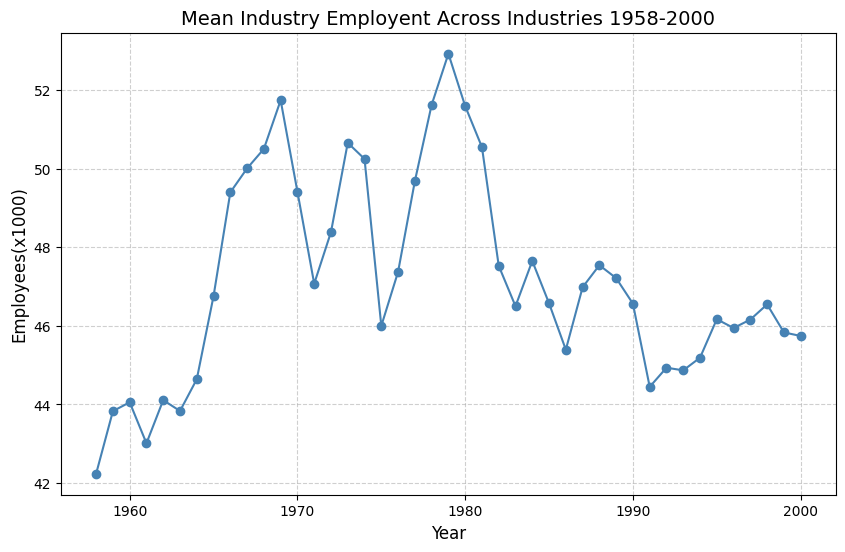

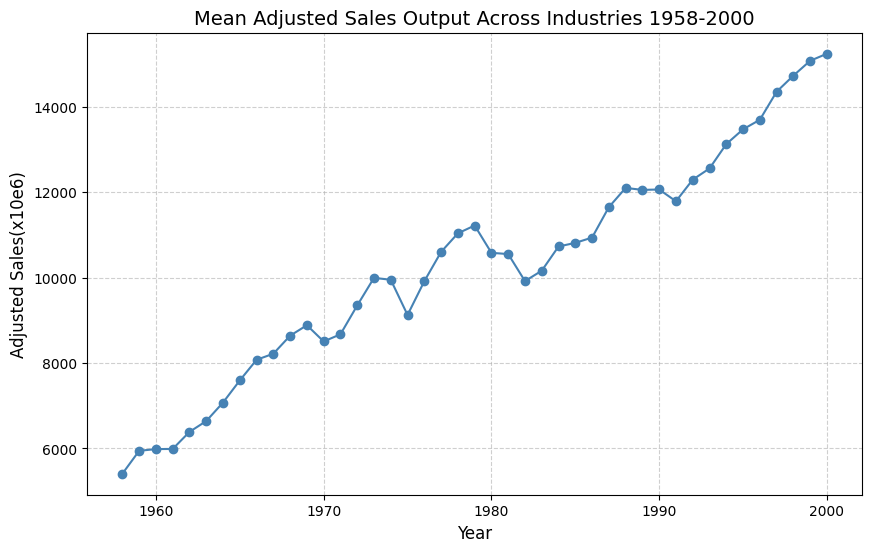


Correlation between employees and adjusted sales: 0.38649486719488363


Scatterplot of mean industry productivity across industries through the years 1958-2000:


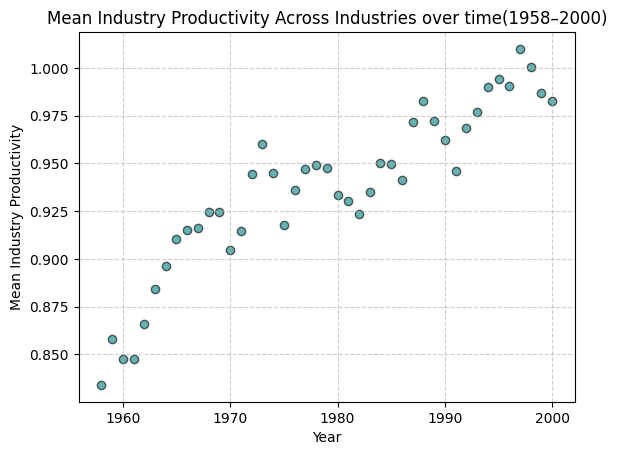

In [ ]:
#1)Finding mean employment across industries
#So I take the mean of employees across all industries, and mean of sales accross all industries
df['real_sales'] = df['sales'] / df['defv'] #Adjusted to account for inflation
df_tracking582000 = df[(df['year'] < 2001) & (df['year'] > 1957)]
mean_emp_582000 = df_tracking582000.groupby('year')[['empworkers']].mean()
mean_sales_582000 = df_tracking582000.groupby('year')[['real_sales']].mean()

print('\nLine Graphs of mean industry employent and sales output through the years 1958-2000:')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_emp_582000.index, mean_emp_582000.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Industry Employent Across Industries 1958-2000', fontsize=14)
ax.set_ylabel('Employees(x1000)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_sales_582000.index, mean_sales_582000.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Adjusted Sales Output Across Industries 1958-2000', fontsize=14)
ax.set_ylabel('Adjusted Sales(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

corr_empsales_582000 = df_tracking582000['empworkers'].corr(df_tracking582000['real_sales'])
print(f'\nCorrelation between employees and adjusted sales: {corr_empsales_582000}\n')


#2)Plotting productivity across industries over time on scatterplot
print('\nScatterplot of mean industry productivity across industries through the years 1958-2000:')
mean_prod_582000 = df_tracking582000.groupby('year')['productivity'].mean()
plt.scatter(mean_prod_582000.index, mean_prod_582000.values, alpha=0.6, color='teal', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Mean Industry Productivity')
plt.title('Mean Industry Productivity Across Industries over time(1958–2000)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


a)The employment graph has less fluctuations but remain well below its 70s peak, showing that manufactuaing job once lost to automation seemed to not be coming back.

b)The sales graph stayed generally linear with less bumps, especially in the 90s.

c)The correlation between the employement and sales is still remains weak.

d)The productivity rose to the point where the U.S. broke even with outputs and inputs, showing the success of the manufacturing industries.

##Digital Manufacturing Era (2001–2018)

This period of time is characterized by the increase in robtoics and very high tech automatation, along with high productivity with one dip in 2007-2010 due to the global financial crisis, the great recession. Here we will look first at a few standard relationships, look to see if energy is being used more efficiently and use box plots regarding productivity to see top-performing sectors. I suspect these might be petroleum again and maybe something with automotive industry. Then I will try to do cases studies on the successful, the upcoming, and the declining industries.

1) Looking at Energy Efficiency and Industry Productivity

a) Cleaning Data

In [ ]:
#1) Cleaning the data in the above mentioned columns
print('a)Checking null sums for productivity and investment, compared to physical capital, tech equipment, sales, and year 1958-2018:')
df_final = df[['productivity','industry','cap','equip','sales', 'year','empworkers', 'invest', 'energy','pien','defv']]
display(df_final.isnull().sum()) #Sales already at 0 null as expected
#However, physical capital(cap) and tech equipment(equip) are missing same amount, 728,
#so that means all the null values are after 2000, invest is missing 364

#2) Lets try to fillna with means of the same industry type and column in the time period
technology_year4 = (df['year'] < 2018) & (df['year'] > 2000)
df_technology_phase4 = df_final[technology_year4].copy()

#This is how I tested what year the mean values were. I found out that it seems that the follow variable were nan for 2017 and 2018 and therefore
#could not be filled with mean or median as I planned. So I will exlude those years from my analysis
'''
for year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]: #Source:Professor
    print(f"\n--- Year {year} ---")
    for col in ['cap']: # Do with cap, equip, productivity, sales
        # checking before
        missing_before = df[(df['year'] == year) & (df[col].isna())].shape[0]
        print(f"Missing before: {missing_before}")

        industry_means = df[df['year'] == year].groupby('industry')[col].mean()
        print(f"Industries with valid means: {industry_means.notna().sum()} / {len(industry_means)}")
        print(f"Industries with NaN means: {industry_means.isna().sum()}")

        for industry in industry_means.index:
            if not pd.isna(industry_means[industry]):  # Only fill if mean exists
                print(industry)
                mask = (df['year'] == year) & (df[col].isna()) & (df['industry'] == industry)
                df.loc[mask, col] = industry_means[industry]

        # checking after
        missing_after = df[(df['year'] == year) & (df[col].isna())].shape[0]
        print(f"Missing after: {missing_after}")
        print(f"Values filled: {missing_before - missing_after}")
'''



a)Checking null sums for productivity and investment, compared to physical capital, tech equipment, sales, and year 1958-2018:


,0
productivity,728
industry,0
cap,728
equip,728
sales,0
year,0
empworkers,0
invest,364
energy,0
pien,0


'\nfor year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]: #Source:Professor\n    print(f"\n--- Year {year} ---")\n    for col in [\'cap\']: # Do with cap, equip, productivity, sales\n        # checking before\n        missing_before = df[(df[\'year\'] == year) & (df[col].isna())].shape[0]\n        print(f"Missing before: {missing_before}")\n        \n        industry_means = df[df[\'year\'] == year].groupby(\'industry\')[col].mean()\n        print(f"Industries with valid means: {industry_means.notna().sum()} / {len(industry_means)}")\n        print(f"Industries with NaN means: {industry_means.isna().sum()}")\n        \n        for industry in industry_means.index:\n            if not pd.isna(industry_means[industry]):  # Only fill if mean exists\n                print(industry)\n                mask = (df[\'year\'] == year) & (df[col].isna()) & (df[\'industry\'] == industry)\n                df.loc[mask, col] = industry_means[industry]\n        \n        # checking after\n      

b) Checking for New Energy Effiency, and TFP across industries


b)Line Graph of the ratio of mean energy/sales across industries used through the years 2000-2016:


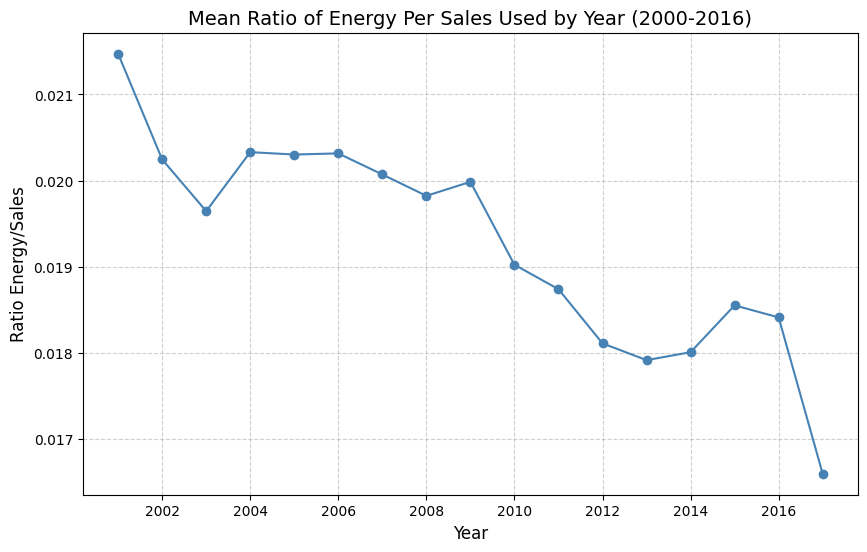


c) 
Correlation between energy and sales: 0.6895265119351339


d) 
Correlation between energy and tech equipment: 0.7804907268629317



/tmp/ipython-input-3759365469.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='industry', y='productivity', data=df_top_tfp, palette='viridis')


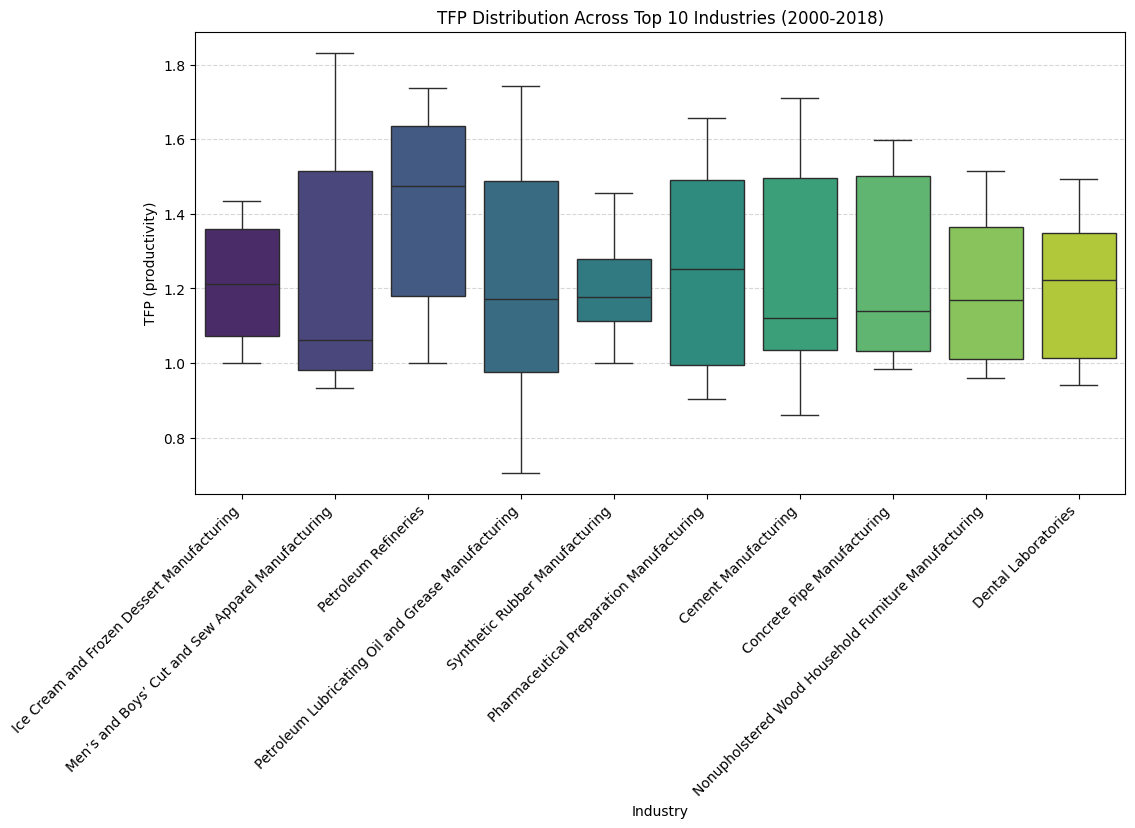

In [ ]:
#1) Define the ratio of interest to me
df_technology_phase4 = df_technology_phase4.copy()
df_technology_phase4.loc[:, 'real_sales_value1'] = df_technology_phase4['sales'] / df_technology_phase4['defv']
df_technology_phase4.loc[:, 'real_energy1'] = df_technology_phase4['energy'] / df_technology_phase4['pien']
df_technology_phase4.loc[:, 'energy_sales_ratio1'] = df_technology_phase4['real_energy1'] / df_technology_phase4['real_sales_value1']

#2) Shows energy intensity trends through the years
print('\nb)Line Graph of the ratio of mean energy/sales across industries used through the years 2000-2016:')
e_over_s_mean2 = df_technology_phase4.groupby('year')['energy_sales_ratio1'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(e_over_s_mean2.index, e_over_s_mean2.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Ratio of Energy Per Sales Used by Year (2000-2016)', fontsize=14)
ax.set_ylabel('Ratio Energy/Sales', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

#3) Correlation between energy/sales ration and equip/cap ratio
corr_energy_sales1 = df_technology_phase4['real_energy1'].corr(df_technology_phase4['real_sales_value1'])
print(f'\nc) \nCorrelation between energy and sales: {corr_energy_sales1}\n')
corr_energy_equip1 = df_technology_phase4['real_energy1'].corr(df_technology_phase4['equip'])
print(f'\nd) \nCorrelation between energy and tech equipment: {corr_energy_equip1}\n')

#4)Box Plot of Productivity
df_mean_tfp = df_technology_phase4.groupby('industry')['productivity'].mean().reset_index()

#5) Select top 10 industries
top_industries = df_mean_tfp.sort_values('productivity', ascending=False).head(10)
top_names = top_industries['industry'].tolist()

#6) Top 10 industries
df_top_tfp = df_technology_phase4[df_technology_phase4['industry'].isin(top_names)]

#7) Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='industry', y='productivity', data=df_top_tfp, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('TFP Distribution Across Top 10 Industries (2000-2018)')
plt.ylabel('TFP (productivity)')
plt.xlabel('Industry')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

b)As expected the energy/sales ration dropped as the automation tools developed more energy efficiency in the 21st century, and sales continues to rise, with the correlation still staying strongly positive.
c)The orrelation between energy and tech equipment still remained strong
d)These box plots show the productivity of the top 10 productive industries with many having their 3rd quartile values push 1.4, 1.5 with petroleum being around 1.65 which shows how much output these industries put out vs input, due to new automation and outsourcing.

###2)Tracking Employment and Sales Output and Productivity from 1958-2018




Line Graphs of mean industry employment and sales output across industries through the years 1958-2018:


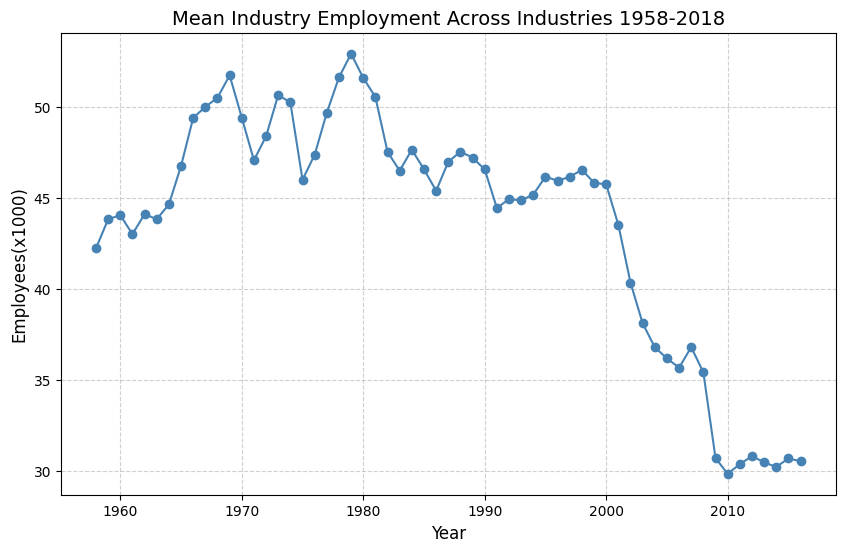

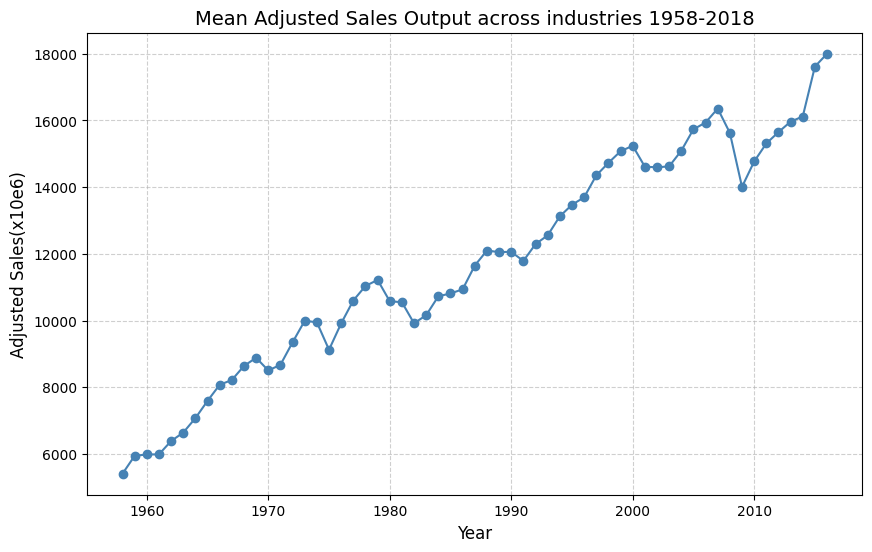


c)Correlation between employees and adjusted sales: 0.30715176586638543


Scatterplot of mean industry productivity through the years 1958-2018:


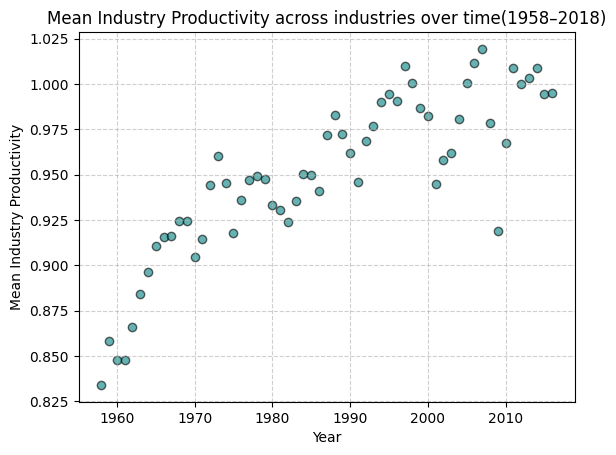

In [ ]:
#Finding mean employment across industries
#So I take the mean of employees across all industries, and mean of sales accross all industries
df['real_sales'] = df['sales'] / df['defv'] #Adjusted to account for inflation
df_tracking582018 = df[(df['year'] < 2017) & (df['year'] > 1957)]
mean_emp_582018 = df_tracking582018.groupby('year')[['empworkers']].mean()
mean_sales_582018 = df_tracking582018.groupby('year')[['real_sales']].mean()

print('\nLine Graphs of mean industry employment and sales output across industries through the years 1958-2018:')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_emp_582018.index, mean_emp_582018.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Industry Employment Across Industries 1958-2018', fontsize=14)
ax.set_ylabel('Employees(x1000)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_sales_582018.index, mean_sales_582018.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Adjusted Sales Output across industries 1958-2018', fontsize=14)
ax.set_ylabel('Adjusted Sales(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

corr_empsales_582018 = df_tracking582018['empworkers'].corr(df_tracking582018['real_sales'])
print(f'\nc)Correlation between employees and adjusted sales: {corr_empsales_582018}\n')

#2)Plotting productivity over time on scatterplot
print('\nScatterplot of mean industry productivity through the years 1958-2018:')
mean_prod_582018 = df_tracking582018.groupby('year')['productivity'].mean()
plt.scatter(mean_prod_582018.index, mean_prod_582018.values, alpha=0.6, color='teal', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Mean Industry Productivity')
plt.title('Mean Industry Productivity across industries over time(1958–2018)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


a)The employment graph has a sharp drop off in the 2000s due to increasing automation and the great recession causing almost a 1/3 of manufacturing jobs to be lost as reflected from the data.

b)The sales graph stayed generally linear but two sharp declines happened in 2000-2002 and 2007-2010 which were the .com bubble and the great recession. But there was reasonable recovery.

c)The correlation between the employement and sales got even weaker during this period a 0.42 difference from the 0.72 value in 1958-1972.

d)The productivity rose to the point where the U.S. broke even with outputs and inputs, showing the success of the manufacturing industries.


4) General Descriptive Statistics Over Time

In [ ]:
#Descriptive Statistics of My Cleaned Variables
df.loc[:, 'real_energy2'] = df['energy'] / df['pien']
df_describe = df[['cap','equip','real_sales','invest', 'real_energy2', 'empworkers']]
print('Descriptive Statistics of My Cleaned Variables')

print("a)First 5 rows:")
display(df_describe.head())
print(f'\nShape: \n{df_describe.shape}')
print(f'\nColumns:\n{df_describe.columns.tolist()}')
print(f'\nData Types:\n{df_describe.dtypes}')
print(f'\nDescription of Data: \n{df_describe.describe()}\n')



Descriptive Statistics of My Cleaned Variables
a)First 5 rows:


,cap,equip,real_sales,invest,real_energy2,empworkers
0,1212.7,517.6,2944.632751,17.8,60.344829,18.0
1,1299.0,573.7,3046.376822,18.3,66.956521,17.9
2,1350.7,611.6,3832.846869,16.1,71.428570,17.7
3,1394.4,642.6,4101.465173,14.5,79.487180,17.5
4,1437.8,669.1,4244.404179,18.4,84.873948,17.6



Shape: 
(22087, 6)

Columns:
['cap', 'equip', 'real_sales', 'invest', 'real_energy2', 'empworkers']

Data Types:
cap             float64
equip           float64
real_sales      float64
invest          float64
real_energy2    float64
empworkers      float64
dtype: object

Description of Data: 
                 cap          equip    real_sales        invest  real_energy2  \
count   21359.000000   21359.000000  2.208700e+04  21723.000000  22087.000000   
mean     4222.125132    2611.354207  1.195023e+04    234.371307    240.958013   
std      9032.291821    6057.777362  3.421445e+04    636.356983    667.755620   
min        12.900000       5.800000  4.514597e-01      0.200000      0.699301   
25%      1002.050000     520.700000  3.177013e+03     32.400000     43.102316   
50%      1979.200000    1130.200000  5.797948e+03     88.500000     87.826085   
75%      4154.100000    2498.000000  1.149981e+04    218.200000    195.938469   
max    191465.600000  141296.500000  1.656781e+06  22278.

These descriptive statistics with deflator concept added in really tell a story more in perspective for us. They a good reference almost like a box plot for the above variables over the entire time. The mean demonstrates the the standard amount of sales outputted, capital and tech equipment, amount of investment in the industy or company and their energy use. The mean is consistently over the 75% quartile indicating that many companies do have a lot of physical and technological capital and high sales and investment. I assum the industries  in the 25% quartile and even some in the 50% quartile are the industries that were more dependent on workers, and there for are having decreased sale output. And what seems to be the only outlier in the data is employed workers which the mean is lower than the 75% quartlie over time indicating that most companies have moved torwards automation.

##Case Studies (1958-2018)

a) Petroleum Industry (Consistent Leader)


Employees vs Year Plot:


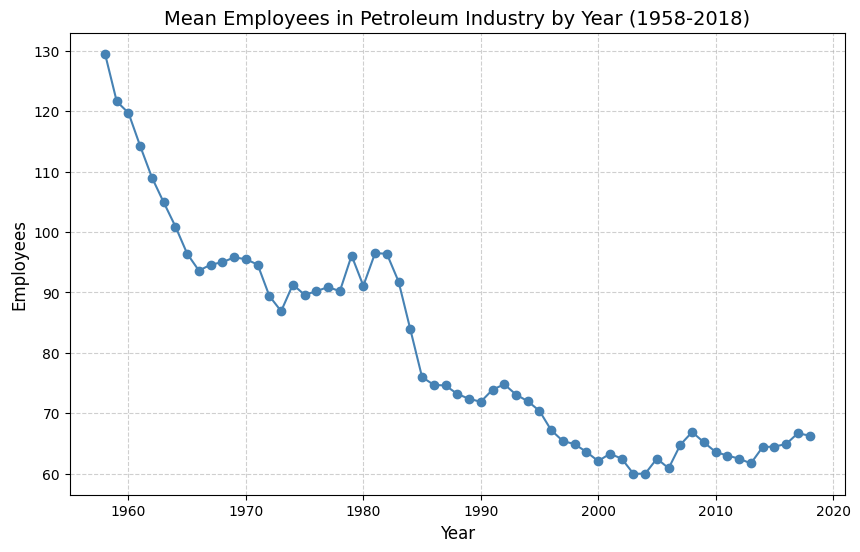


Capital, Equipment, and Investment vs Year Plot:


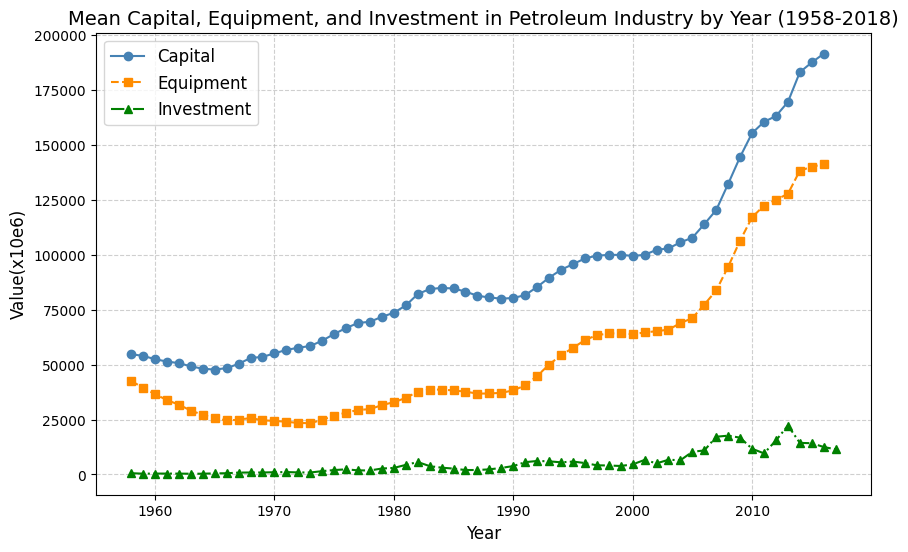

,cap,equip,productivity,empworkers
cap,1.000000,0.976710,-0.083023,-0.743553
equip,0.976710,1.000000,-0.106795,-0.655625
productivity,-0.083023,-0.106795,1.000000,-0.280269
empworkers,-0.743553,-0.655625,-0.280269,1.000000


In [ ]:
#1)Lets look at the petroleum industry through time
whole_span = (df['year'] < 2019) & (df['year'] > 1957)
df_total = df[whole_span].copy()
df_petroleum = df_total[df_total['industry'] == 'Petroleum Refineries']

#2)Capital vs Employment for petroleum industry
mean_petrol_year = df_petroleum.groupby('year')[['empworkers']].mean()
mean_petrol_cap = df_petroleum.groupby('year')[['cap','equip','invest']].mean()


print('\nEmployees vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_petrol_year.index, mean_petrol_year.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Employees in Petroleum Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Employees', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

print('\nCapital, Equipment, and Investment vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_petrol_cap.index, mean_petrol_cap['cap'], marker='o', linestyle='-', color='steelblue', label='Capital')
ax.plot(mean_petrol_cap.index, mean_petrol_cap['equip'], marker='s', linestyle='--', color='darkorange', label='Equipment')
ax.plot(mean_petrol_cap.index, mean_petrol_cap['invest'], marker='^', linestyle='-.', color='green', label='Investment')
ax.set_title('Mean Capital, Equipment, and Investment in Petroleum Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Value(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

#Correlation Table
df_petroleum[['cap','equip','productivity','empworkers']].corr()



Diving more into Petroleum was interesting but the results based on our previous analysis makes complete sense. There total employment decreased by more than half while their capital has more than doubled from 1958-2018. Their investments while small on the graph are still the second highest in the 1986-2000 time range. They were even succeeding with high investment and capital during the financial crisis.

There capital and equipment both have a reasonable correlation with productivity and this high amount of total capital and new technology has led to a strong negative correlation with emplyees. Employees also have a negative correlation with productivity which explain the sharp decline in the 2000s. Petroleum is the perfect example of what many long lasting manufacturers have to do to maintain high sales output and productivity. However, it comes at the expense of thousands of workers, as these manufactering job don't come back once lost to tech. Its a sad situation as tech can do the job for less money in maintenance, leaving many manufactering workers without work.

b) Semiconductor and Related Device Manufacturing (Rising Industry)


Employees vs Year Plot:


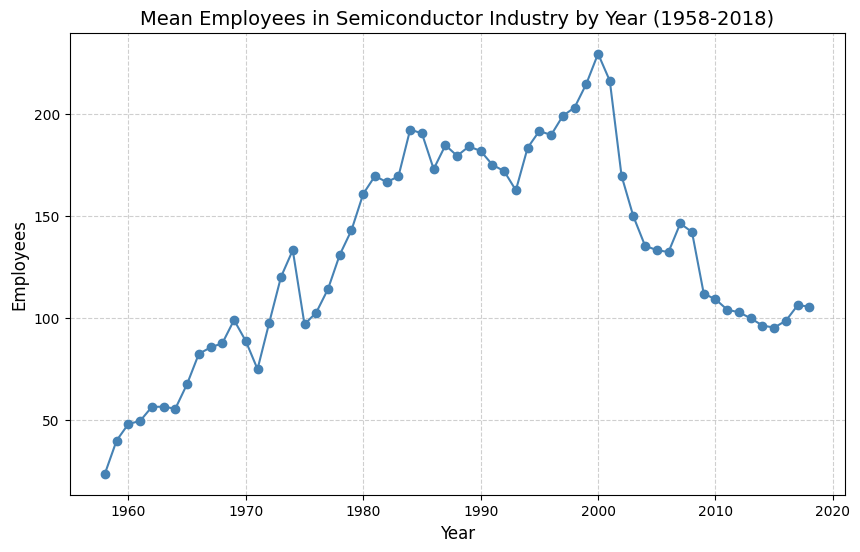


Capital, Equipment, and Investment vs Year Plot:


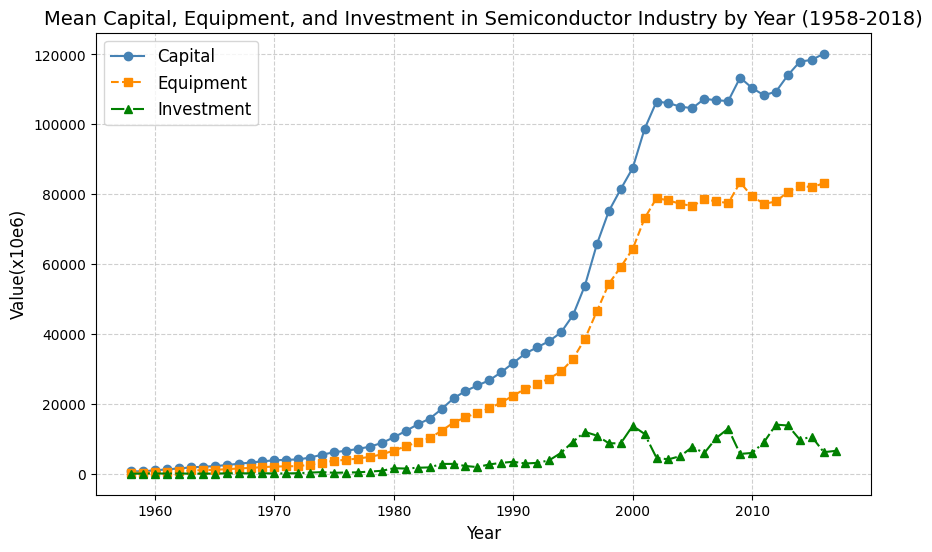


Correlation map between cap, equip, productivity, and empworkers:


,cap,equip,productivity,empworkers
cap,1.000000,0.999490,0.930653,0.272785
equip,0.999490,1.000000,0.925385,0.278977
productivity,0.930653,0.925385,1.000000,-0.016476
empworkers,0.272785,0.278977,-0.016476,1.000000


In [ ]:
#Lets look at a newer entity in the excelling industries and how they got there.
#1)Lets look at the Semiconductor and Related Device Manufacturing industry through time
whole_span = (df['year'] < 2019) & (df['year'] > 1957)
df_total = df[whole_span].copy()
df_semiconductor = df_total[df_total['industry'] == 'Semiconductor and Related Device Manufacturing']

#2)Capital vs Employment for Semiconductor Industry
mean_semi_emp = df_semiconductor.groupby('year')[['empworkers']].mean()
mean_semi_cap = df_semiconductor.groupby('year')[['cap','equip','invest']].mean()

print('\nEmployees vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_semi_emp.index, mean_semi_emp.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Employees in Semiconductor Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Employees', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

print('\nCapital, Equipment, and Investment vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_semi_cap.index, mean_semi_cap['cap'], marker='o', linestyle='-', color='steelblue', label='Capital')
ax.plot(mean_semi_cap.index, mean_semi_cap['equip'], marker='s', linestyle='--', color='darkorange', label='Equipment')
ax.plot(mean_semi_cap.index, mean_semi_cap['invest'], marker='^', linestyle='-.', color='green', label='Investment')
ax.set_title('Mean Capital, Equipment, and Investment in Semiconductor Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Value(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

#Correlation Table
print('\nCorrelation map between cap, equip, productivity, and empworkers:')
df_semiconductor[['cap','equip','productivity','empworkers']].corr()



Using the same analysis as with Petroleum, the Semiconductor industry is also following similar trends. However, the difference is their business became relevant moreso in the last 30 years, with new tech like with car chip and other electrical aspects. They started with basically no investments, capital, and technical equipment, no employees in 1960. However in the 90sall three of those dramatically started to increase, while the 2000s again marked the sharp decline in employees. Then the capital and equipment steadied and the investing fluctuated until 2018, but they still have managed to maintain their large investing status and keep sales output high. This industry was and is highly subject to outsourcing making their profits greats and their employee count in the U.S. go down sadly. THis is also a very techy field as the correlations show that their tech lead to an almost linear relationship with produxtivity.

c) Nonupholstered Wood Household Furniture Manufacturing (Dying in U.S.)


Employees vs Year Plot:


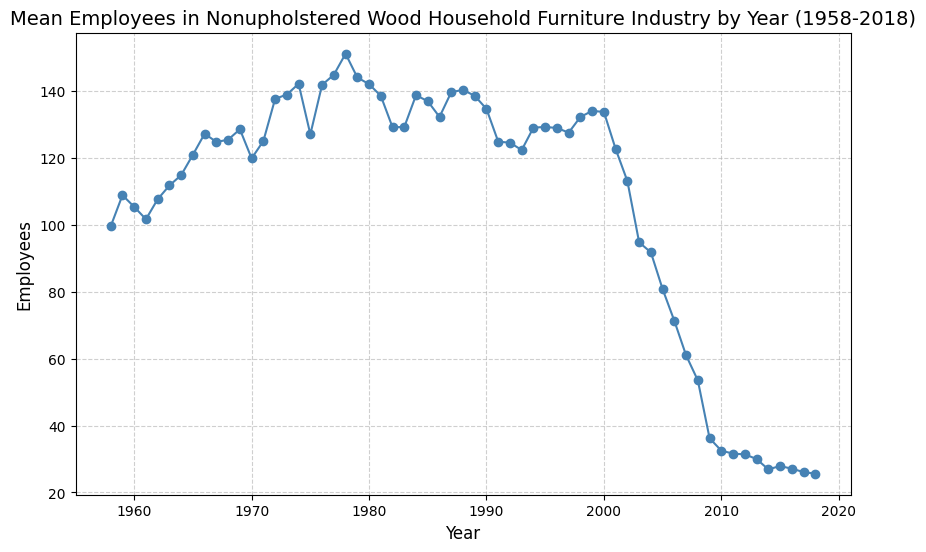


Capital, Equipment, and Investment vs Year Plot:


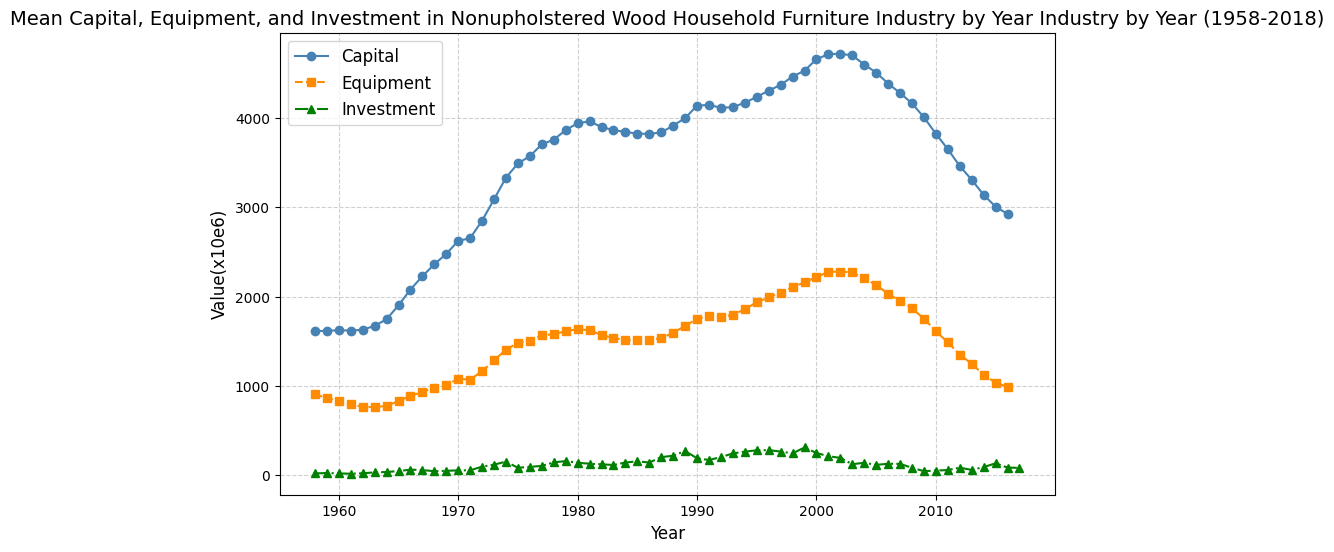

,cap,equip,productivity,empworkers
cap,1.000000,0.960244,-0.061526,0.047134
equip,0.960244,1.000000,0.030584,0.091544
productivity,-0.061526,0.030584,1.000000,0.923195
empworkers,0.047134,0.091544,0.923195,1.000000


In [ ]:
#Lets look at a newer entity in the excelling industries and how they got there.
#1)Lets look at the Nonupholstered Wood Household Furniture Industry through time
whole_span = (df['year'] < 2019) & (df['year'] > 1957)
df_total = df[whole_span].copy()
df_wood = df_total[df_total['industry'] == 'Nonupholstered Wood Household Furniture Manufacturing']

#2)Capital vs Employment for the Nonupholstered Wood Household Furniture Industry
mean_wood_emp = df_wood.groupby('year')[['empworkers']].mean()
mean_wood_cap = df_wood.groupby('year')[['cap','equip','invest']].mean()

print('\nEmployees vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_wood_emp.index, mean_wood_emp.values, marker='o', linestyle='-', color='steelblue')
ax.set_title('Mean Employees in Nonupholstered Wood Household Furniture Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Employees', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

print('\nCapital, Equipment, and Investment vs Year Plot:')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_wood_cap.index, mean_wood_cap['cap'], marker='o', linestyle='-', color='steelblue', label='Capital')
ax.plot(mean_wood_cap.index, mean_wood_cap['equip'], marker='s', linestyle='--', color='darkorange', label='Equipment')
ax.plot(mean_wood_cap.index, mean_wood_cap['invest'], marker='^', linestyle='-.', color='green', label='Investment')
ax.set_title('Mean Capital, Equipment, and Investment in Nonupholstered Wood Household Furniture Industry by Year Industry by Year (1958-2018)', fontsize=14)
ax.set_ylabel('Value(x10e6)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.show()

#Correlation Table
df_wood[['cap','equip','productivity','empworkers']].corr()



This furniture industry I guessed would probably be suffering more than others as it is subject to outsourcing, and automation replacing jobs, and more likely that the U.S. imports these from other countries. Because of this employment in this field in the U.S. is at most 20,000, dropping 80% since the year 2000, and capital, equipment are declining since 2000 by around 40% with investing close to 0. This is an example of an industry that was table before the 21st century, but is massively losing presence in the U.S., causing the loss of more than 100000 jobs in the U.S. similar to semiconductors, and more than petroleum. Notice the correlations as well, unlike like the last two cases, their productivity is linear with employees, and has no correlation to capital or equipment.

##Conclusion

The manufacturing industry from the post war bloom of 1958 to the automated world of 2018 changed significantly due to the decrease of employees and increase in automation. Industries that adopted more capital, invested more in their assets, and technical equipment with the times, especially in the later 80s to 2000s found themselves with higher sales output and productivity above 1.4. This was shown in long standing Industries such as petroleum and newer companies like Semiconductors, where the trends were similar with cap, equip, and invest, all sailing from the 90s on. Companies that were dependent employee work like the Nonupholstered Wood Household Furniture Industry, did not acocunt as much on investments and faced outsourcing and a severe decline in employment as well as there capital and quipment, with other overseas industries taking over.

Employment was highly valued in the 60s and early 70s with the tech ratio of tech equip/ total equip was less than 0.5 and steadily increasing with a 0.72 correlation between workers and sales output, which was increasing linearly. However, this correlation dropped to 0.4, to 0.38, and 0.3 in the following year segments, meaning sales output was no longer increasing with workers. This was due to not only autmation but likely historical issues including the great recession, which together removed 1/3 of manufacturing jobs. I think the decline of workers, and increase in my other variables, as well as the general state of the sector is show well through my Tracking Employment and Sales Outputand productivity sections for each year group.

Meanwhile the correlations for variables such as equip, cap, both had a linear trends and strong correlations with productivity and sales output according to the correlation table above and other correlations that were taken through phases of time, which many upward of 0.8. However, two things that did not match my argument was the plot of the ratio equip/empworkers vs productivity which was not linear as I expected and the correlation was practically 0. Overall though, the data shows the trends of equipment,capital, sales go up with the times together, while manufacturing employment delcines.


